In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import read_key, read_list

API_KEY = read_key("key.txt")
# API_KEY = ""  # or paste it here

# OntoChat API tutorial

## Story creation

## CQ extraction

## CQ analysis

## Ontology pre-testing

In [3]:
from ontolib import ChatInterface

interface = ChatInterface(api_key=API_KEY)

In [4]:
from verbaliser import verbalise_ontology

ontology_path = "../../idea/data/samples/musicmeta.owl"

onto_about = "music metadata"
onto_desc  = "The ontology is supposed to describe music metadata  related to "\
             "artists, compositions, performances, and recordings."

In [5]:
verb = verbalise_ontology(ontology_path, onto_about, onto_desc)

In [6]:
print(verb)

Ontology description: music metadata. The ontology is supposed to describe music metadata  related to artists, compositions, performances, and recordings.
The main classes of the ontology are listed below:
- Abstract Score: An abstract concept that allows to refer to the actual musical content of a MusicEntity. This makes it possible to describe musical properties that imply the existence of a hypothetical score, which may not be necessarily, or formally, materialised by the creators of the musical entity.
- Annotation Method: An annotation method refers to the nature of the procedure used for producing annotation on an artifact.
- Award: An award is intended as a recognition for a creative outcome, or more generally, for an activity carried out over a period of time. Typically, an award is given by an organisation and follows a recurring event.
- Broadcaster (subconcept of Agent): A class representing an entity or organization involved in broadcasting or transmitting audio or video co

### Onto2CQ and CQ-pretest

In [7]:
from ontolib import extract_competency_questions, test_competency_questions
from ontolib import split_cq_test_data

In [ ]:
extracted_cqs = extract_competency_questions(
    onto_verbalisation=verb,
    chat_interface=interface)

In [ ]:
extracted_cqs

In [23]:
import re

match = re.search(r"^(Yes|No),\s+(.*)", "Yes, asdasdasd asd a sd as d")
explanation = match.group(1)

explanation

'Yes'

#### On a sample

In [25]:
cq_list = [
    "Who are the parents of a music artist?",
    "Where did a music artist study?",
    "What is the genre of a music entity?",
    "Who are the authors of a music entity?"]

cq_dict = test_competency_questions(verb, cq_list, chat_interface=interface)
cq_dict

100%|██████████| 4/4 [00:08<00:00,  2.13s/it]


{'Who are the parents of a music artist?': ('No', ''),
 'Where did a music artist study?': ('No', ''),
 'What is the genre of a music entity?': ('Yes', ''),
 'Who are the authors of a music entity?': ('Yes', '')}

#### On all the CQs

In [35]:
cq_pos_x = read_list("../data/music_meta_cqs.txt")
cq_neg_x = read_list("../data/music_meta_cqs_neg.txt")

cq_pos_label = [1] * len(cq_pos_x)
cq_neg_label = [0] * len(cq_neg_x)

print(f"Loaded {len(cq_pos_x)} positive and {len(cq_neg_x)} negative CQs")

Loaded 28 positive and 28 negative CQs


In [29]:
cq_dict_pos = test_competency_questions(
    verb, cq_pos_x, chat_interface=interface)
cq_dict_pos

100%|██████████| 28/28 [02:34<00:00,  5.53s/it]


{'Which is the composer of a musical piece?': ('Yes', ''),
 'Is the composer of a musical piece known?': ('Yes',
  ', the ontology described can address the competency question "Is the composer of a musical piece known?" The ontology includes classes and properties related to composers, compositions, and creative processes, allowing for the representation and retrieval of information about the composer of a musical piece. By querying the ontology, it is possible to determine whether the composer of a musical piece is known or not.'),
 'Which are the members of a music ensemble?': ('Yes', ''),
 'Which role a music artist played within a music ensemble?': ('Yes', ''),
 'In which time interval has a music artist been a member of a music ensemble?': ('Yes',
  ''),
 'Where was a music ensemble formed?': ('Yes', ''),
 'Which award was a music artist nominated for?': ('Yes', ''),
 'Which award was received by a music artist?': ('Yes',
  ', the ontology can address the competency question "Whi

In [32]:
cq_dict_neg = test_competency_questions(
    verb, cq_neg_x, chat_interface=interface)
cq_dict_neg

  0%|          | 0/28 [00:00<?, ?it/s]

100%|██████████| 28/28 [02:45<00:00,  5.92s/it]


{'In which year did a music artist achieve their highest popularity within a music ensemble?': ('No',
  ''),
 'To which record label is a music ensemble currently signed?': ('No', ''),
 'Which music critic gave a music artist a negative review?': ('No', ''),
 'For which category did a music artist lose an award?': ('No', ''),
 'Which music artists are considered rivals of a music artist?': ('No', ''),
 'To which music artist has a music artist been compared?': ('No', ''),
 'Is a music artist currently touring?': ('No',
  ", the ontology described does not provide explicit information or classes related to a music artist's touring activities. It focuses more on describing music metadata related to artists, compositions, performances, recordings, and other aspects of the music industry. To address the question of whether a music artist is currently touring, additional information or classes related to tour schedules, concert dates, or performance locations would need to be included in th

In [33]:
cq_original_x, cq_original_preds = split_cq_test_data(cq_dict_pos)
cq_negative_x, cq_negative_preds = split_cq_test_data(cq_dict_neg)

In [38]:
cq_labels = cq_pos_label + cq_neg_label
cq_preds = cq_original_preds + cq_negative_preds

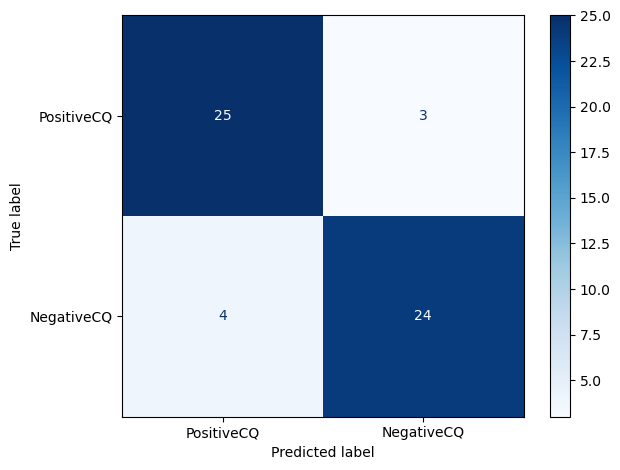

In [48]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(cq_labels, cq_preds)

# Create a visual representation
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["PositiveCQ", "NegativeCQ"])
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')

plt.tight_layout()
plt.savefig("../evaluation/cq_test_conf.pdf")